In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
main_df = pd.read_pickle(custom_df)

In [3]:
# Function to automate splitting up the GOES flux 

def goes_flux(df, flux_column):
    a = df[ (flux_column <= -7.0) ]  
    b = df[ (flux_column > -7.0) & (flux_column <= -6.0) ]  
    c = df[ (flux_column > -6.0) & (flux_column <= -5.0) ]  
    m = df[ (flux_column > -5.0) & (flux_column <= -4.0) ]  
    x = df[ (flux_column > -4.0) ]
    
    return a, b, c, m, x

In [4]:
# CME speeds
df = main_df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
df = df.dropna(how='any')

# Reindexing
df = df.reset_index(drop=True)

# total flux is an object
df.smart_total_flux = df.smart_total_flux.astype(float)

# Splitting up the CME speeds
s1 = df[ (df.cme_speed > 0)    & (df.cme_speed < 1000) ]  
s2 = df[ (df.cme_speed >= 1000) & (df.cme_speed < 2000) ]  
s3 = df[ (df.cme_speed >= 2000) & (df.cme_speed < 3000) ]  
s4 = df[ (df.cme_speed >= 3000) ]

In [5]:
test = df[ (df.cme_speed > 800) ] 
len(test)

524

In [6]:
print(len(df))
print(len(s1),'\n',len(s2),'\n',len(s3),'\n',len(s4))

6667
6392 
 257 
 17 
 1


In [7]:
print(max(df.smart_total_flux))
print(max(df.smart_total_area))
s4

4.39e+23
53367.65


,cme_speed,smart_total_area,smart_r_value,smart_total_flux
2105,3387.0,6433.06,169741.36,4.760000e+22


In [8]:
print(df.cme_speed.idxmax())
print(df.smart_total_area.idxmax())
print(df.smart_total_flux.idxmax())

2105
1748
1748


In [9]:
df.iloc[1748]

cme_speed           8.270000e+02
smart_total_area    5.336765e+04
smart_r_value       1.351872e+06
smart_total_flux    4.390000e+23
Name: 1748, dtype: float64

In [10]:
df2 = main_df[['smart_total_flux', 'smart_negative_flux', 'smart_positive_flux', 'smart_flux_fraction']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

df2.smart_total_flux = df2.smart_total_flux.astype(float)
df2.smart_negative_flux = df2.smart_negative_flux.astype(float)
df2.smart_positive_flux = df2.smart_positive_flux.astype(float)

In [11]:
print(df2.smart_flux_fraction.iloc[1])

0.07


In [12]:
(df2.smart_positive_flux.iloc[1] - df2.smart_negative_flux.iloc[1])/df2.smart_total_flux.iloc[1]

0.06728971962616821

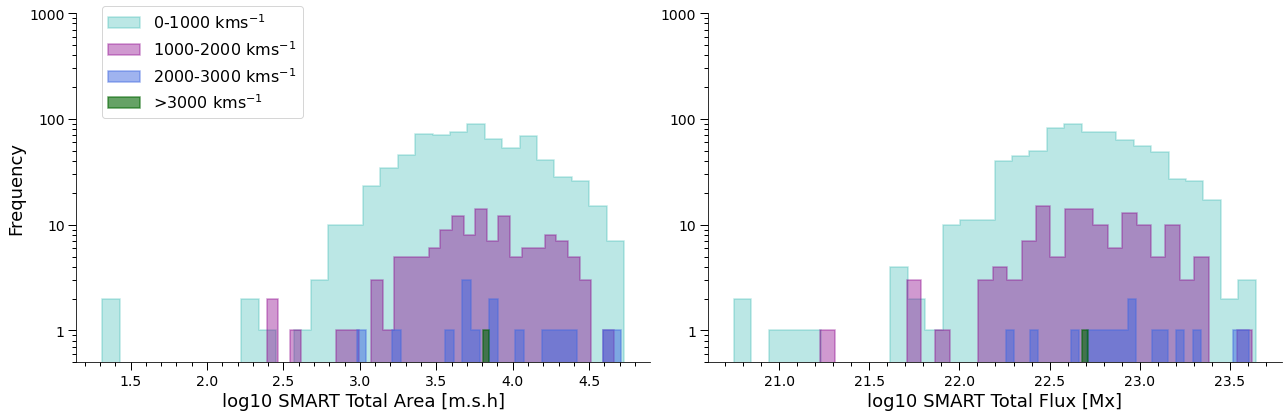

In [13]:
# CME speeds
dfsp = main_df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux', 'goes_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# total flux is an object
dfsp.smart_total_flux = dfsp.smart_total_flux.astype(float)

dfsp = dfsp[ (np.log10(dfsp.goes_flux) > -5.0) ]

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 1000) ]  
s2 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 2000) ]  
s3 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 3000) ]  
s4 = dfsp[ (dfsp.cme_speed > 3000) ]

import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig('speed_step_flux.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [14]:
# How many CMEs have associated ARs? ---------> 7746

t1 = main_df[['cme_speed']]
t2 = main_df[['smart_total_area']]
t3 = main_df[['srs_active_region_no']]
t4 = main_df[['smart_total_area', 'srs_active_region_no']]

t1 = t1.dropna(how='any')
t2 = t2.dropna(how='any')
t3 = t3.dropna(how='any')
t4 = t4.dropna(how='all')

print(len(t1))
print(len(t2))
print(len(t3))
print(len(t4))

30125
6681
7385
7746


In [15]:
print('Only ' + str(round((7746/30125)*100, 1)) + '% of all recorded CMEs have associated ARs')

Only 25.7% of all recorded CMEs have associated ARs


## Tangent... $\rightarrow$ Hale class

In [16]:
#=== Flare props ===========================================================================================================
dfs = main_df[['srs_hale', 'smart_total_area', 'cme_speed', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Converting string values to floats
dfs['srs_hale'] = dfs['srs_hale'].astype(float)
dfs['smart_total_flux'] = dfs['smart_total_flux'].astype(float)

# Reindexing
dfs = dfs.reset_index(drop=True)

# Separate each class 
a = dfs.loc[dfs['srs_hale'] == 1.0]     # alpha
b = dfs.loc[dfs['srs_hale'] == 2.0]     # beta
bg = dfs.loc[dfs['srs_hale'] == 3.0]    # beta-gamma
bd = dfs.loc[dfs['srs_hale'] == 4.0]    # beta-delta
bgd = dfs.loc[dfs['srs_hale'] == 5.0]   # beta-gamma-delta
gd = dfs.loc[dfs['srs_hale'] == 6.0]    # gamma-delta

# Splitting up the CME speeds
s1 = dfs[ (dfs.cme_speed > 0)    & (dfs.cme_speed <= 1000) ]  
s2 = dfs[ (dfs.cme_speed > 1000) & (dfs.cme_speed <= 2000) ]  
s3 = dfs[ (dfs.cme_speed > 2000) & (dfs.cme_speed <= 3000) ]  
s4 = dfs[ (dfs.cme_speed > 3000) ]

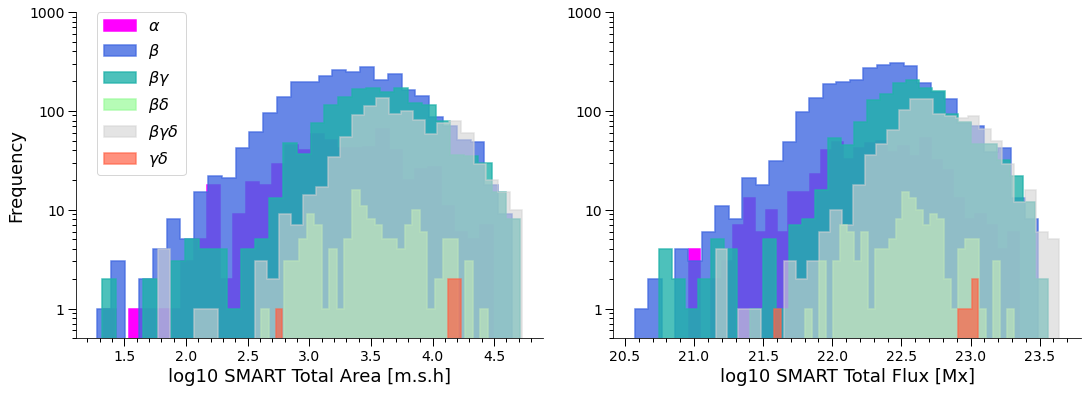

In [17]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
n1, b1, p1 = ax1.hist(np.log10(a.smart_total_area), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_area), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_area), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax1.hist(np.log10(gd.smart_total_area), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.50], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# flux with relation to CME speed
n1, b1, p1 = ax2.hist(np.log10(a.smart_total_flux), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(np.log10(b.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(np.log10(bg.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(np.log10(bd.smart_total_flux), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(np.log10(bgd.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax2.hist(np.log10(gd.smart_total_flux), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

#plt.savefig('hale_class.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

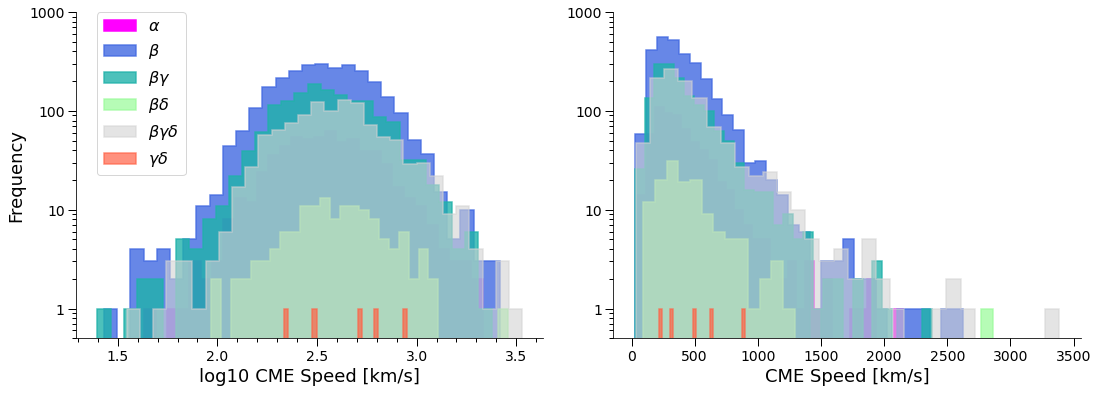

In [18]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
n1, b1, p1 = ax1.hist(np.log10(a.cme_speed), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.cme_speed), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.cme_speed), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.cme_speed), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.cme_speed), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax1.hist(np.log10(gd.cme_speed), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 CME Speed [km/s]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.50], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# flux with relation to CME speed
n1, b1, p1 = ax2.hist(a.cme_speed, 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax2.hist(gd.cme_speed, 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [km/s]', fontsize=18)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

#ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

#plt.savefig('hale_class2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

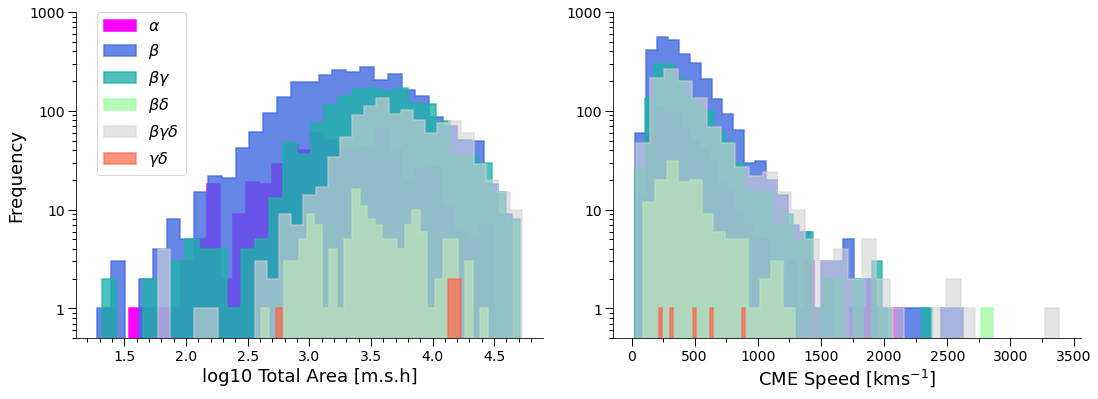

In [27]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# area 
n1, b1, p1 = ax1.hist(np.log10(a.smart_total_area), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_area), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_area), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax1.hist(np.log10(gd.smart_total_area), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.50], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# speed
n1, b1, p1 = ax2.hist(a.cme_speed, 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax2.hist(gd.cme_speed, 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(250))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

#plt.savefig('hale_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()